In [20]:
import pandas as pd

# CSV 파일 읽기
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 데이터 확인
print(train_df.head())  # 상위 5개 행 출력
print(train_df.info())  # 데이터 정보 출력
# 데이터 확인
print(test_df.head())  # 상위 5개 행 출력
print(test_df.info())  # 데이터 정보 출력

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [22]:
len(train_df), len(test_df)

(10886, 6493)

In [24]:
# 데이터 확인하기 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [59]:
# 연월일시분초 분리
year, month, day, hour, min, sec = [],[],[],[],[],[]
for i in train_df.datetime:
    year.append(i.split()[0].split('-')[0]) # 연도
    month.append(i.split()[0].split('-')[1]) # 달
    day.append(i.split()[0].split('-')[2]) # 일
    
    hour.append(i.split()[1].split(':')[0]) # 시간
    min.append(i.split()[1].split(':')[1]) # 분
    sec.append(i.split()[1].split(':')[2]) # 초
    
train_df['year'] = [int(x) for x in year]
train_df['month'] = [int(x) for x in month]
train_df['day'] = [int(x) for x in day]
train_df['hour'] = [int(x) for x in hour]
train_df['min'] = [int(x) for x in min]
train_df['sec'] = [int(x) for x in sec]
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'min', 'sec'],
      dtype='object')

In [61]:
set(train_df.year)

{2011, 2012}

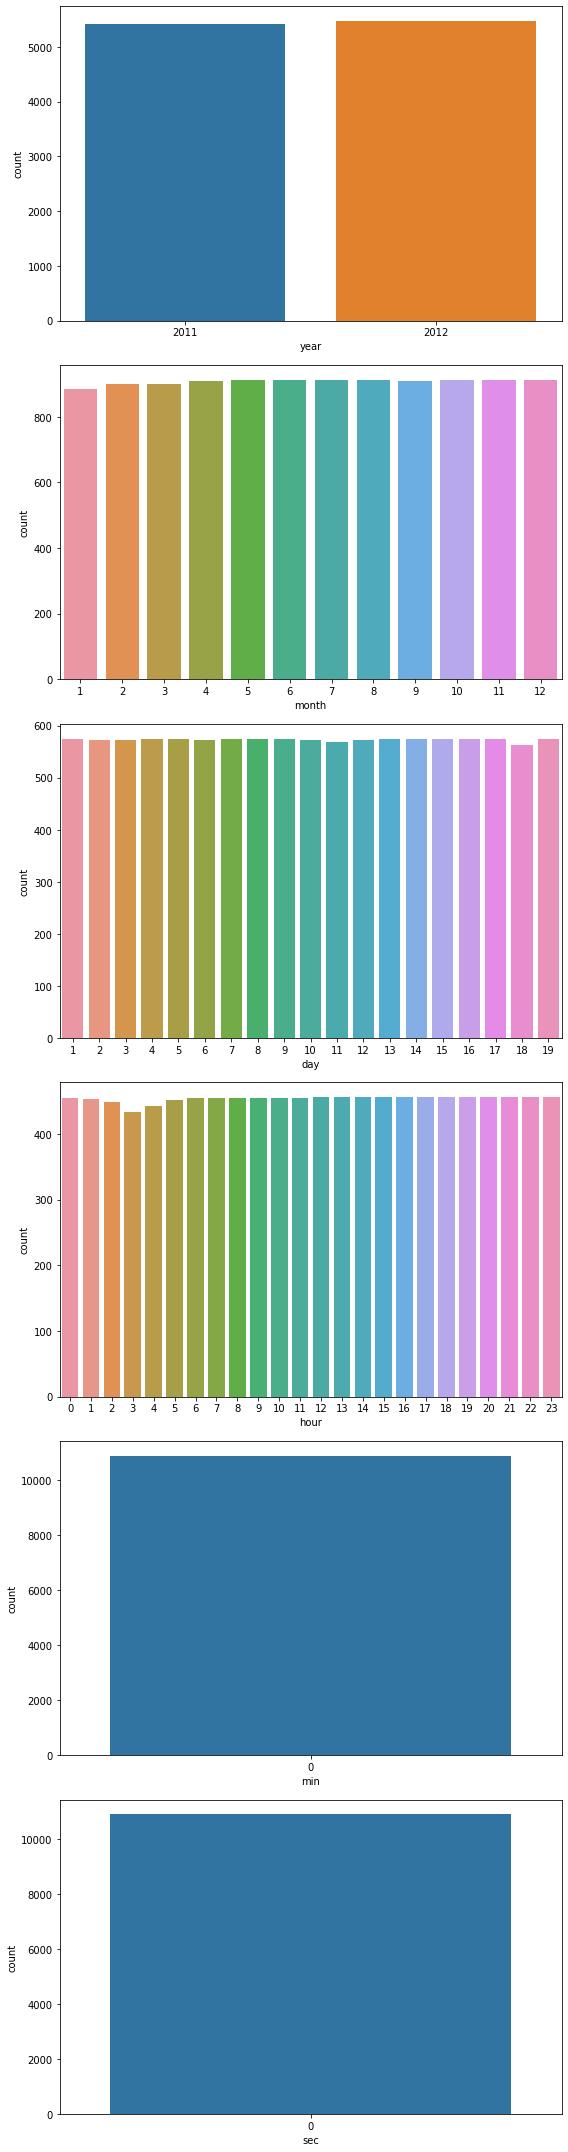

In [76]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 30))

plt.subplot(6, 1, 1)
sns.countplot(data=train_df, x='year')

plt.subplot(6, 1, 2)
sns.countplot(data=train_df, x='month')

plt.subplot(6, 1, 3)
sns.countplot(data=train_df, x='day')

plt.subplot(6, 1, 4)
sns.countplot(data=train_df, x='hour')

plt.subplot(6, 1, 5)
sns.countplot(data=train_df, x='min')

plt.subplot(6, 1, 6)
sns.countplot(data=train_df, x='sec')

plt.tight_layout()
plt.show()

In [101]:
# X, y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['count','registered', 'datetime']) 
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, train_df.registered, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'year', 'month', 'day', 'hour',
       'min', 'sec'],
      dtype='object')


((8164, 15), (2722, 15), (8164,), (2722,))

In [102]:
#  LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [103]:
# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차:", mse)

rmse = np.sqrt(mse)
print("루트 평균 제곱 오차 :", rmse)

평균 제곱 오차: 12661.571815584077
루트 평균 제곱 오차 : 112.52365002782338


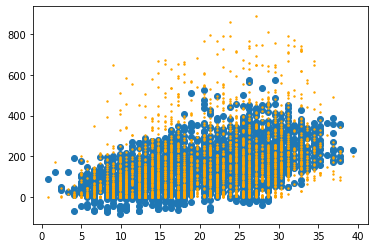

In [104]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

plt.scatter(X_test['temp'], y_pred)
plt.scatter(X_test['temp'], y_test, c='orange', s=2)
plt.show()